# Exploring Movies Dataset and Gaining insight out of it.

In this project, I have tried to find some interesting insights into a few movies released between 1916 and 2016, using python. I have explored the data, gains insights into the movies, actors, directors, and collections.

## 1: Reading and Inspection

-  ### 1.1: Importing and reading

#### Importing important libraries

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd

#### Importing and reading the movie database.

In [3]:
# Read the csv file
movies = pd.read_csv('Movie+Assignment+Data.csv')
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


-  ### 1.2: Inspect the dataframe

#### Inspecting the dataframe's columns, shapes, variable types etc.

In [4]:
# checking the number of rows and columns in a dataframe
movies.shape

(5043, 28)

In [5]:
# Checking the column-wise info of the dataframe
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

#### Changing the data type of the `title_year` column as its data type is float

In [6]:
movies['title_year'] = pd.to_datetime(movies['title_year'], format='%Y')

In [7]:
movies['title_year'].dtypes

dtype('<M8[ns]')

In [8]:
movies.dtypes

color                                object
director_name                        object
num_critic_for_reviews              float64
duration                            float64
director_facebook_likes             float64
actor_3_facebook_likes              float64
actor_2_name                         object
actor_1_facebook_likes              float64
gross                               float64
genres                               object
actor_1_name                         object
movie_title                          object
num_voted_users                       int64
cast_total_facebook_likes             int64
actor_3_name                         object
facenumber_in_poster                float64
plot_keywords                        object
movie_imdb_link                      object
num_user_for_reviews                float64
language                             object
country                              object
content_rating                       object
budget                          

## 2: Cleaning the Data

-  ### 2.1: Inspect Null values

Finding out the number of Null values in all the columns and rows. Also, finding the percentage of Null values in each column, and rounding off the percentages upto two decimal places.

In [11]:
# Column-wise NULL count using 'is.null()' alongwith the 'sum()'

movies.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [12]:
# Row-Wise null count the same way. This time specifying axis = 1

movies.isnull().sum(axis=1)


0        0
1        0
2        0
3        0
4       14
        ..
5038     4
5039     5
5040     4
5041     2
5042     0
Length: 5043, dtype: int64

In [13]:
# Column-Wise null percentages by dividing the sum obtained previously by the total length, multiplying it by 100 and rounding 
# it off to two decimal places

round(100*(movies.isnull().sum() / len(movies.index)),2)


color                         0.38
director_name                 2.06
num_critic_for_reviews        0.99
duration                      0.30
director_facebook_likes       2.06
actor_3_facebook_likes        0.46
actor_2_name                  0.26
actor_1_facebook_likes        0.14
gross                        17.53
genres                        0.00
actor_1_name                  0.14
movie_title                   0.00
num_voted_users               0.00
cast_total_facebook_likes     0.00
actor_3_name                  0.46
facenumber_in_poster          0.26
plot_keywords                 3.03
movie_imdb_link               0.00
num_user_for_reviews          0.42
language                      0.28
country                       0.10
content_rating                6.01
budget                        9.76
title_year                    2.14
actor_2_facebook_likes        0.26
imdb_score                    0.00
aspect_ratio                  6.52
movie_facebook_likes          0.00
dtype: float64

-  ### 2.2: Droping unecessary columns

I am mostly analyzing the movies with respect to the ratings, gross collection, popularity of movies, etc. So many of the columns in this dataframe are not required. So dropping the following columns.
- color 
- actor_3_facebook_likes
- cast_total_facebook_likes
- actor_2_facebook_likes
- facenumber_in_poster 
- movie_imdb_link 
- aspect_ratio
- plot_keywords
- actor_2_name
- actor_3_name

In [14]:
# Using the 'drop()' function to drop the unnecessary columns

movies = movies.drop(['color', 
                      'actor_3_facebook_likes', 
                      'cast_total_facebook_likes', 
                      'actor_2_facebook_likes', 
                      'facenumber_in_poster', 
                      'movie_imdb_link', 
                      'aspect_ratio',
                      'plot_keywords',
                      'actor_2_name',
                      'actor_3_name'], 
                       axis = 1)
movies


,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,USA,PG-13,237000000.0,2009-01-01,7.9,33000
1,Gore Verbinski,302.0,169.0,563.0,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,USA,PG-13,300000000.0,2007-01-01,7.1,0
2,Sam Mendes,602.0,148.0,0.0,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,UK,PG-13,245000000.0,2015-01-01,6.8,85000
3,Christopher Nolan,813.0,164.0,22000.0,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,USA,PG-13,250000000.0,2012-01-01,8.5,164000
4,Doug Walker,NaN,NaN,131.0,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,NaN,NaN,NaN,NaN,NaN,NaT,7.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.0,87.0,2.0,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,6.0,English,Canada,NaN,NaN,2013-01-01,7.7,84
5039,NaN,43.0,43.0,NaN,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,359.0,English,USA,TV-14,NaN,NaT,7.5,32000
5040,Benjamin Roberds,13.0,76.0,0.0,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,3.0,English,USA,NaN,1400.0,2013-01-01,6.3,16
5041,Daniel Hsia,14.0,100.0,0.0,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,9.0,English,USA,PG-13,NaN,2012-01-01,6.3,660


In [15]:
# Inspecting the dataset: Notice only 13 columns are left.

movies.shape

(5043, 18)

-  ### 2.3: Dropping unecessary rows using columns with high Null percentages

Now, on inspection I noticed that some columns have large percentage (greater than 5%) of Null values. So, dropping all the rows which have Null values for such columns.

In [16]:
# Inspecting the percentages of Null values again

round(100*(movies.isnull().sum()/len(movies.index)), 2)


director_name               2.06
num_critic_for_reviews      0.99
duration                    0.30
director_facebook_likes     2.06
actor_1_facebook_likes      0.14
gross                      17.53
genres                      0.00
actor_1_name                0.14
movie_title                 0.00
num_voted_users             0.00
num_user_for_reviews        0.42
language                    0.28
country                     0.10
content_rating              6.01
budget                      9.76
title_year                  2.14
imdb_score                  0.00
movie_facebook_likes        0.00
dtype: float64

In [17]:
group_gross_and_budget = movies.set_index(['gross', 'budget'])
group_gross_and_budget.head(50)

,,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,content_rating,title_year,imdb_score,movie_facebook_likes
gross,budget,,,,,,,,,,,,,,,,
760505847.0,2.370000e+08,James Cameron,723.0,178.0,0.0,1000.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,USA,PG-13,2009-01-01,7.9,33000
309404152.0,3.000000e+08,Gore Verbinski,302.0,169.0,563.0,40000.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,USA,PG-13,2007-01-01,7.1,0
200074175.0,2.450000e+08,Sam Mendes,602.0,148.0,0.0,11000.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,UK,PG-13,2015-01-01,6.8,85000
448130642.0,2.500000e+08,Christopher Nolan,813.0,164.0,22000.0,27000.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,USA,PG-13,2012-01-01,8.5,164000
NaN,NaN,Doug Walker,NaN,NaN,131.0,131.0,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,NaN,NaN,NaN,NaN,NaT,7.1,0
73058679.0,2.637000e+08,Andrew Stanton,462.0,132.0,475.0,640.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,USA,PG-13,2012-01-01,6.6,24000
336530303.0,2.580000e+08,Sam Raimi,392.0,156.0,0.0,24000.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,1902.0,English,USA,PG-13,2007-01-01,6.2,0
200807262.0,2.600000e+08,Nathan Greno,324.0,100.0,15.0,799.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,387.0,English,USA,PG,2010-01-01,7.8,29000
458991599.0,2.500000e+08,Joss Whedon,635.0,141.0,0.0,26000.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,1117.0,English,USA,PG-13,2015-01-01,7.5,118000


#### Since 'gross' and 'budget' columns have large number of NaN values and dropping these NaN values is useful as these NULL values don't assist in analyzing movies with respect gross collection and budget.

In [18]:
movies = movies[~np.isnan(movies['gross'])]
movies = movies[~np.isnan(movies['budget'])]
movies

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,USA,PG-13,237000000.0,2009-01-01,7.9,33000
1,Gore Verbinski,302.0,169.0,563.0,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,USA,PG-13,300000000.0,2007-01-01,7.1,0
2,Sam Mendes,602.0,148.0,0.0,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,UK,PG-13,245000000.0,2015-01-01,6.8,85000
3,Christopher Nolan,813.0,164.0,22000.0,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,USA,PG-13,250000000.0,2012-01-01,8.5,164000
5,Andrew Stanton,462.0,132.0,475.0,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,USA,PG-13,263700000.0,2012-01-01,6.6,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,77.0,291.0,291.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371.0,English,USA,PG-13,7000.0,2004-01-01,7.0,19000
5034,Neill Dela Llana,35.0,80.0,0.0,0.0,70071.0,Thriller,Ian Gamazon,Cavite,589,35.0,English,Philippines,Not Rated,7000.0,2005-01-01,6.3,74
5035,Robert Rodriguez,56.0,81.0,0.0,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,USA,R,7000.0,1992-01-01,6.9,0
5037,Edward Burns,14.0,95.0,0.0,296.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14.0,English,USA,Not Rated,9000.0,2011-01-01,6.4,413


In [19]:
# Inspecting the percentages of NaN
round(100*(movies.isnull().sum()/len(movies.index)),2)

director_name              0.00
num_critic_for_reviews     0.03
duration                   0.03
director_facebook_likes    0.00
actor_1_facebook_likes     0.08
gross                      0.00
genres                     0.00
actor_1_name               0.08
movie_title                0.00
num_voted_users            0.00
num_user_for_reviews       0.00
language                   0.10
country                    0.00
content_rating             1.31
budget                     0.00
title_year                 0.00
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

In [20]:
movies.isnull().sum()

director_name               0
num_critic_for_reviews      1
duration                    1
director_facebook_likes     0
actor_1_facebook_likes      3
gross                       0
genres                      0
actor_1_name                3
movie_title                 0
num_voted_users             0
num_user_for_reviews        0
language                    4
country                     0
content_rating             51
budget                      0
title_year                  0
imdb_score                  0
movie_facebook_likes        0
dtype: int64

-  ### 2.4: Fill NaN values

You might notice that the `language` column has some NaN values. Here, on inspection, you will see that it is safe to replace all the missing values with `'English'`.

In [21]:
movies['language'].value_counts(sort=True)

language
English       3707
French          37
Spanish         26
Mandarin        15
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Thai             3
Hebrew           3
Persian          3
Danish           3
Dutch            3
Dari             2
Indonesian       2
Aboriginal       2
Arabic           1
Russian          1
Vietnamese       1
Dzongkha         1
Romanian         1
Zulu             1
Bosnian          1
Czech            1
Icelandic        1
Hungarian        1
Mongolian        1
Aramaic          1
Telugu           1
Kazakh           1
Maya             1
Filipino         1
Swedish          1
Name: count, dtype: int64

In [22]:
# Inspect the language column of the dataset
movies['language'].describe()


count        3887
unique         37
top       English
freq         3707
Name: language, dtype: object

In [23]:
# Fill the NaN values with 'English' since most of the movies are in the English language

movies.loc[pd.isnull(movies['language']), ['language']] = 'English'
movies

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,USA,PG-13,237000000.0,2009-01-01,7.9,33000
1,Gore Verbinski,302.0,169.0,563.0,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,USA,PG-13,300000000.0,2007-01-01,7.1,0
2,Sam Mendes,602.0,148.0,0.0,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,UK,PG-13,245000000.0,2015-01-01,6.8,85000
3,Christopher Nolan,813.0,164.0,22000.0,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,USA,PG-13,250000000.0,2012-01-01,8.5,164000
5,Andrew Stanton,462.0,132.0,475.0,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,USA,PG-13,263700000.0,2012-01-01,6.6,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,77.0,291.0,291.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371.0,English,USA,PG-13,7000.0,2004-01-01,7.0,19000
5034,Neill Dela Llana,35.0,80.0,0.0,0.0,70071.0,Thriller,Ian Gamazon,Cavite,589,35.0,English,Philippines,Not Rated,7000.0,2005-01-01,6.3,74
5035,Robert Rodriguez,56.0,81.0,0.0,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,USA,R,7000.0,1992-01-01,6.9,0
5037,Edward Burns,14.0,95.0,0.0,296.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14.0,English,USA,Not Rated,9000.0,2011-01-01,6.4,413


In [24]:
# Inspecting NaNs

print("Percentage of NaNs:",round(100*(movies.isnull().sum()/len(movies.index)), 2))
print("Sum of NaNs:", movies.isnull().sum())

Percentage of NaNs: director_name              0.00
num_critic_for_reviews     0.03
duration                   0.03
director_facebook_likes    0.00
actor_1_facebook_likes     0.08
gross                      0.00
genres                     0.00
actor_1_name               0.08
movie_title                0.00
num_voted_users            0.00
num_user_for_reviews       0.00
language                   0.00
country                    0.00
content_rating             1.31
budget                     0.00
title_year                 0.00
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64
Sum of NaNs: director_name               0
num_critic_for_reviews      1
duration                    1
director_facebook_likes     0
actor_1_facebook_likes      3
gross                       0
genres                      0
actor_1_name                3
movie_title                 0
num_voted_users             0
num_user_for_reviews        0
language                    0
country         

#### One rule of thumb is to remove observations if they amount to 5% or less of all values.

In [25]:
threshold = len(movies) * 0.05
print(threshold)

194.55


In [26]:
cols_to_drop = movies.columns[movies.isna().sum() <= threshold]
print(cols_to_drop)

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_1_facebook_likes', 'gross', 'genres',
       'actor_1_name', 'movie_title', 'num_voted_users',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')


In [27]:
movies.dropna(subset=cols_to_drop, inplace=True)


In [28]:
print("Sum of NaNs:", movies.isnull().sum())

Sum of NaNs: director_name              0
num_critic_for_reviews     0
duration                   0
director_facebook_likes    0
actor_1_facebook_likes     0
gross                      0
genres                     0
actor_1_name               0
movie_title                0
num_voted_users            0
num_user_for_reviews       0
language                   0
country                    0
content_rating             0
budget                     0
title_year                 0
imdb_score                 0
movie_facebook_likes       0
dtype: int64


Finally, no missing values

-  ### 2.5: Checking the number of retained rows

Checking the number and percentage of the rows retained after completing all the tasks above.

In [29]:
# Get the number of retained rows using 'len()'
print(len(movies.index))
print(len(movies.index)/5043)

3838
0.761054927622447


**Checkpoint 1:** You might have noticed that we still have around `76%` of the rows!

## 3: Data Analysis

-  ### 3.1: Analyzing Categorical Data: Previewing the data


In [30]:
movies.select_dtypes("object").head()

,director_name,genres,actor_1_name,movie_title,language,country,content_rating
0,James Cameron,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,English,USA,PG-13
1,Gore Verbinski,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,PG-13
2,Sam Mendes,Action|Adventure|Thriller,Christoph Waltz,Spectre,English,UK,PG-13
3,Christopher Nolan,Action|Thriller,Tom Hardy,The Dark Knight Rises,English,USA,PG-13
5,Andrew Stanton,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,English,USA,PG-13


#### A). Who directed the maximum number of movies?

In [31]:
# The 5 directors who produced maximum number movies

top_5_directors = movies["director_name"].value_counts().head()

In [32]:
top_5_directors.head()

director_name
Steven Spielberg    25
Clint Eastwood      19
Woody Allen         19
Ridley Scott        17
Tim Burton          16
Name: count, dtype: int64

#### Visualization

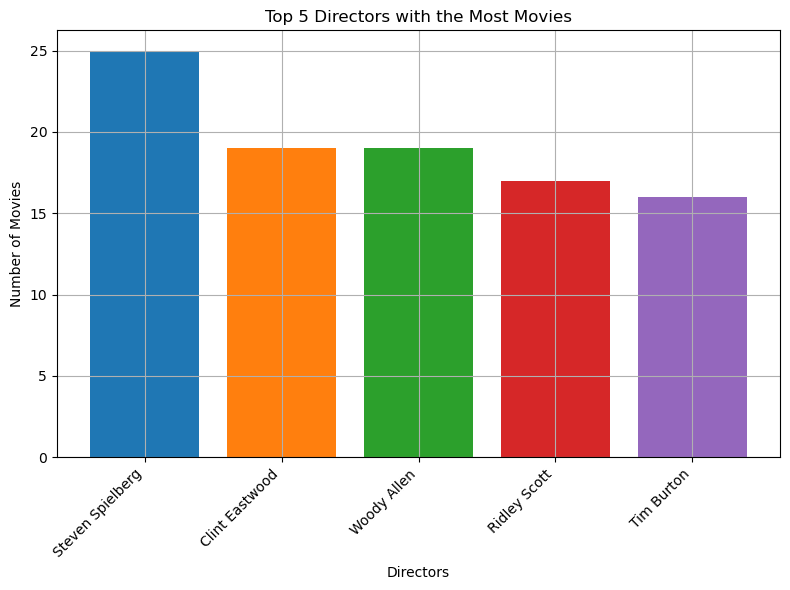

In [33]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt


# Choose a colormap 
cmap = cm.get_cmap('tab10')

# create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(top_5_directors.index, top_5_directors.values, color=cmap(range(len(top_5_directors))))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add informative labels and title
plt.xlabel("Directors")
plt.ylabel("Number of Movies")
plt.title("Top 5 Directors with the Most Movies")

# Add grid lines
plt.grid(True)  

# Show the plot
plt.tight_layout()
plt.show()

Maximum number of movies are directed by Steven Spielberg, Clint Eastwood, Woody Allen, Ridley Scott, and Steven Soderbergh

#### B). Visualizing Content Rating

In [34]:
movies['content_rating'].value_counts()

content_rating
R            1737
PG-13        1330
PG            576
G              91
Not Rated      41
Unrated        24
Approved       17
X              10
NC-17           6
Passed          3
M               2
GP              1
Name: count, dtype: int64

In [51]:
movies['content_rating'].unique()

array(['PG-13', 'PG', 'G', 'R', 'Approved', 'NC-17', 'nan', 'X',
       'Not Rated', 'Unrated', 'M', 'GP', 'Passed'], dtype=object)

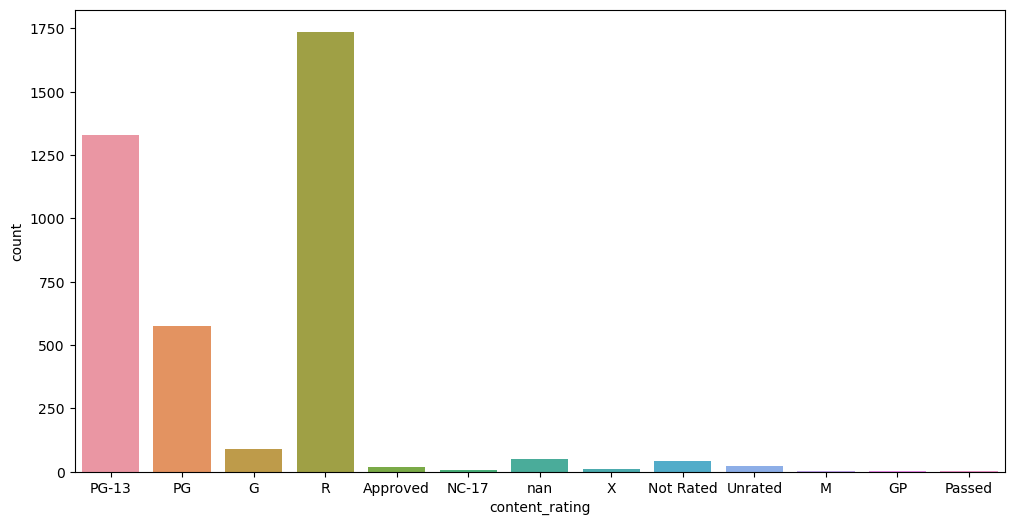

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=movies, x="content_rating")
plt.show()




- R (Restricted), which requires accompanying parent or adult guardian as it has the presence of mature themes, strong language, explicit violence, nudity, or sexual content. These kind of movies directed were approximately 1750.

- PG-13 (Parents Strongly Cautioned): These were the second category of the movies directed, which were around 1300.

- PG (Parental Guidance Suggested): Around 540 movies directed in this type of content

#### Moreover, after visualizing we came across that nan, Not Rated, and Unrated could be combined into one as Unrated. 

In [53]:
mapping = {'nan':'Unrated', 'Not Rated':'Unrated'}
movies["content_rating"] = movies["content_rating"].replace(mapping)
movies["content_rating"].unique()

array(['PG-13', 'PG', 'G', 'R', 'Approved', 'NC-17', 'Unrated', 'X', 'M',
       'GP', 'Passed'], dtype=object)

In [54]:
movies["content_rating"].value_counts()

content_rating
R           1737
PG-13       1330
PG           576
Unrated      113
G             91
Approved      17
X             10
NC-17          6
Passed         3
M              2
GP             1
Name: count, dtype: int64

#### nan, Not Rated, and Unrated are combined into one as Unrated. Visualizing it again to get a clear picture.

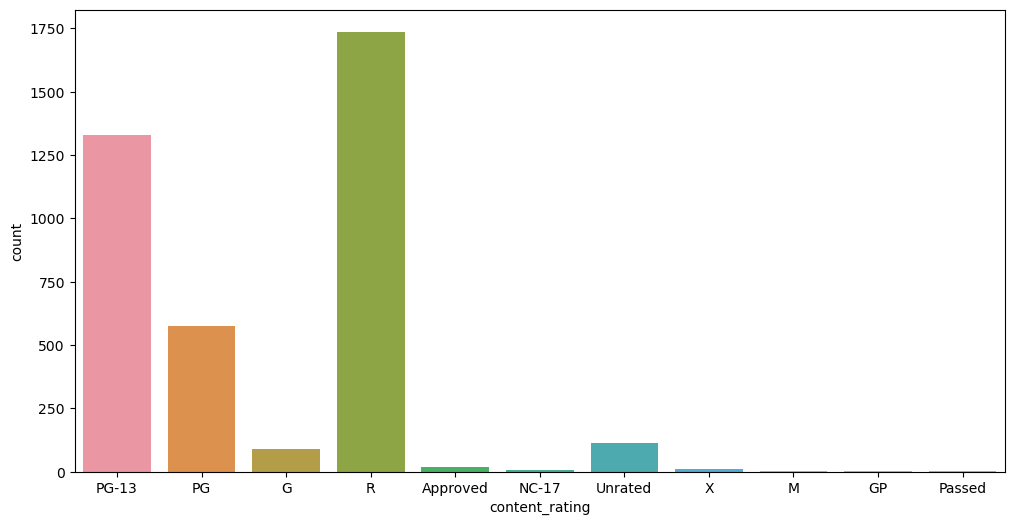

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=movies, x="content_rating")
plt.show()

#### C). Top 5 countries producing maximum number of movies

In [35]:
# The top 5 countries producing movies
top_5_countries = movies['country'].value_counts().head(5)

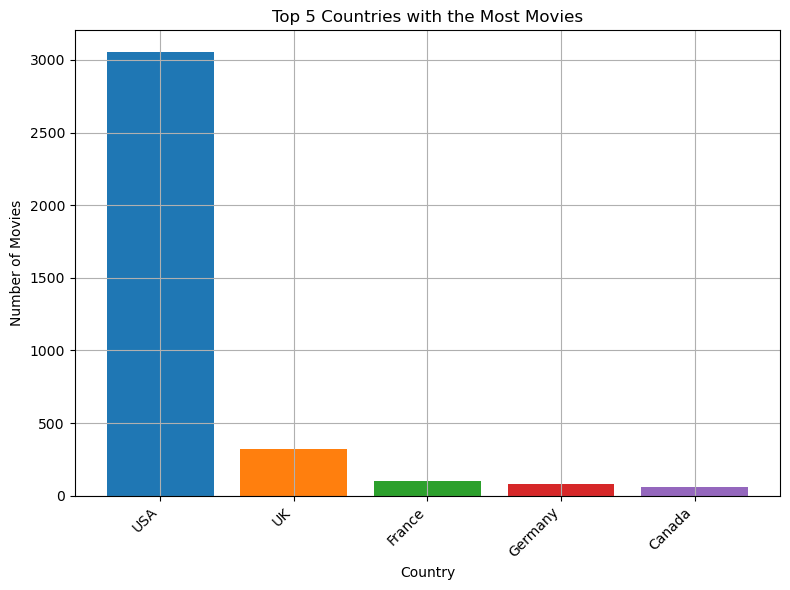

In [36]:
import matplotlib.cm as cm

# Choose a colormap 
cmap = cm.get_cmap('tab10')

# create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(top_5_countries.index, top_5_countries.values, color=cmap(range(len(top_5_countries))))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add informative labels and title
plt.xlabel("Country")
plt.ylabel("Number of Movies")
plt.title("Top 5 Countries with the Most Movies")

# Add grid lines
plt.grid(True)  

# Show the plot
plt.tight_layout()
plt.show()

In the <b>country</b> column, USA produces the maximum number of movies. Next in line is the UK. 

#### D). Which Language was mostly used? 

In [38]:
language = movies['language'].value_counts().head()

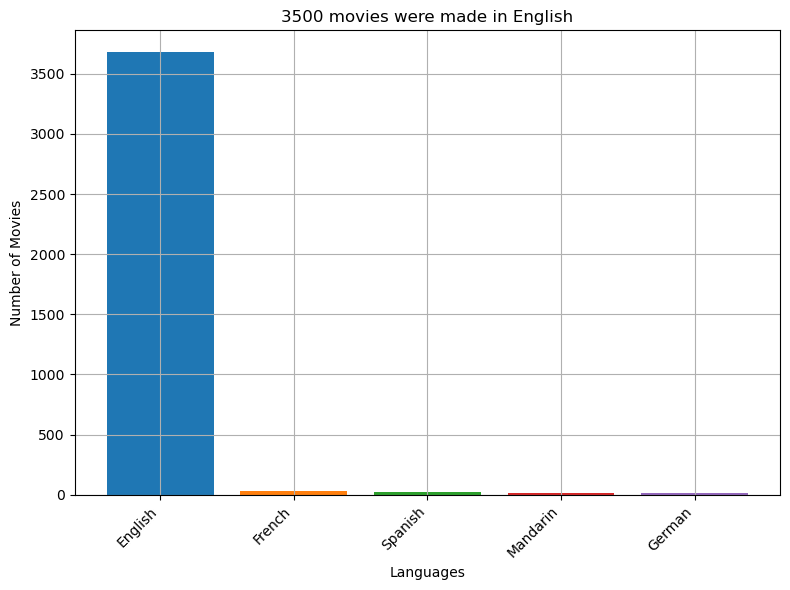

In [39]:
import matplotlib.cm as cm

# Choose a colormap 
cmap = cm.get_cmap('tab10')

# create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(language.index, language.values, color=cmap(range(len(language))))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add informative labels and title
plt.xlabel("Languages")
plt.ylabel("Number of Movies")
plt.title("3500 movies were made in English")

# Add grid lines
plt.grid(True)  

# Show the plot
plt.tight_layout()
plt.show()

English is the only language with most number of movies.

-  ### 3.2: Analyzing Numerical Data



In [40]:
movies.select_dtypes("number").head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,num_user_for_reviews,budget,imdb_score,movie_facebook_likes
0,723.0,178.0,0.0,1000.0,760505847.0,886204,3054.0,237000000.0,7.9,33000
1,302.0,169.0,563.0,40000.0,309404152.0,471220,1238.0,300000000.0,7.1,0
2,602.0,148.0,0.0,11000.0,200074175.0,275868,994.0,245000000.0,6.8,85000
3,813.0,164.0,22000.0,27000.0,448130642.0,1144337,2701.0,250000000.0,8.5,164000
5,462.0,132.0,475.0,640.0,73058679.0,212204,738.0,263700000.0,6.6,24000


In [41]:
movies.select_dtypes("number").info()

<class 'pandas.core.frame.DataFrame'>
Index: 3838 entries, 0 to 5042
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_critic_for_reviews   3838 non-null   float64
 1   duration                 3838 non-null   float64
 2   director_facebook_likes  3838 non-null   float64
 3   actor_1_facebook_likes   3838 non-null   float64
 4   gross                    3838 non-null   float64
 5   num_voted_users          3838 non-null   int64  
 6   num_user_for_reviews     3838 non-null   float64
 7   budget                   3838 non-null   float64
 8   imdb_score               3838 non-null   float64
 9   movie_facebook_likes     3838 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 329.8 KB


#### A). Changing the datatype of some numerical columns to int.

In [42]:
movies['num_critic_for_reviews'] = movies['num_critic_for_reviews'].astype(int) 
movies['num_user_for_reviews'] = movies['num_user_for_reviews'].astype(int) 
movies['actor_1_facebook_likes'] = movies['actor_1_facebook_likes'].astype(int) 
movies['director_facebook_likes'] = movies['director_facebook_likes'].astype(int)

print(movies['actor_1_facebook_likes'].dtypes)
print(movies['director_facebook_likes'].dtypes)
print(movies['num_critic_for_reviews'].dtypes)
print(movies['num_user_for_reviews'].dtypes)

int32
int32
int32
int32


In [43]:
movies.select_dtypes("number").info()

<class 'pandas.core.frame.DataFrame'>
Index: 3838 entries, 0 to 5042
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_critic_for_reviews   3838 non-null   int32  
 1   duration                 3838 non-null   float64
 2   director_facebook_likes  3838 non-null   int32  
 3   actor_1_facebook_likes   3838 non-null   int32  
 4   gross                    3838 non-null   float64
 5   num_voted_users          3838 non-null   int64  
 6   num_user_for_reviews     3838 non-null   int32  
 7   budget                   3838 non-null   float64
 8   imdb_score               3838 non-null   float64
 9   movie_facebook_likes     3838 non-null   int64  
dtypes: float64(4), int32(4), int64(2)
memory usage: 269.9 KB


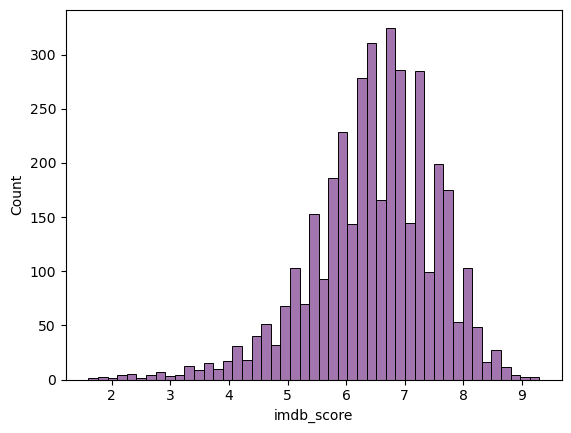

In [149]:
sns.histplot(data=movies, x="imdb_score")
plt.show()

Most of the IMDb scores are between 6.3 and 7.2

#### B). Change the unit of columns

Convert the unit of the `budget` and `gross` columns from `$` to `million $`.

In [44]:
# Divide the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'

movies['gross'] = movies['gross']/1000000
movies['budget'] = movies['budget']/1000000
movies

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723,178.0,0,1000,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,USA,PG-13,237.0000,2009-01-01,7.9,33000
1,Gore Verbinski,302,169.0,563,40000,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,USA,PG-13,300.0000,2007-01-01,7.1,0
2,Sam Mendes,602,148.0,0,11000,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,UK,PG-13,245.0000,2015-01-01,6.8,85000
3,Christopher Nolan,813,164.0,22000,27000,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,USA,PG-13,250.0000,2012-01-01,8.5,164000
5,Andrew Stanton,462,132.0,475,640,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,USA,PG-13,263.7000,2012-01-01,6.6,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143,77.0,291,291,0.424760,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371,English,USA,PG-13,0.0070,2004-01-01,7.0,19000
5034,Neill Dela Llana,35,80.0,0,0,0.070071,Thriller,Ian Gamazon,Cavite,589,35,English,Philippines,Not Rated,0.0070,2005-01-01,6.3,74
5035,Robert Rodriguez,56,81.0,0,121,2.040920,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130,Spanish,USA,R,0.0070,1992-01-01,6.9,0
5037,Edward Burns,14,95.0,0,296,0.004584,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14,English,USA,Not Rated,0.0090,2011-01-01,6.4,413


-  #### C). Find the movies with highest profit

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`

In [45]:
# Create a new column named 'profit' by substracting the 'budget' column from the 'gross' column

movies['profit'] = movies['gross'] - movies['budget']
movies.head()


,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723,178.0,0,1000,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,USA,PG-13,237.0,2009-01-01,7.9,33000,523.505847
1,Gore Verbinski,302,169.0,563,40000,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,USA,PG-13,300.0,2007-01-01,7.1,0,9.404152
2,Sam Mendes,602,148.0,0,11000,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,UK,PG-13,245.0,2015-01-01,6.8,85000,-44.925825
3,Christopher Nolan,813,164.0,22000,27000,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,USA,PG-13,250.0,2012-01-01,8.5,164000,198.130642
5,Andrew Stanton,462,132.0,475,640,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,USA,PG-13,263.7,2012-01-01,6.6,24000,-190.641321


In [46]:
# Sort the dataframe with the 'profit' column as reference using the 'sort_values' function, and setting the argument ascending
# to False
movies = movies.sort_values(by = 'profit', ascending = False)
movies

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723,178.0,0,1000,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,USA,PG-13,237.000000,2009-01-01,7.9,33000,523.505847
29,Colin Trevorrow,644,124.0,365,3000,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,USA,PG-13,150.000000,2015-01-01,7.0,150000,502.177271
26,James Cameron,315,194.0,0,29000,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,USA,PG-13,200.000000,1997-01-01,7.7,26000,458.672302
3024,George Lucas,282,125.0,0,11000,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,USA,PG,11.000000,1977-01-01,8.7,33000,449.935665
3080,Steven Spielberg,215,120.0,14000,861,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,USA,PG,10.500000,1982-01-01,7.9,34000,424.449459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,Katsuhiro Ôtomo,105,103.0,78,488,0.410388,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,79,Japanese,Japan,PG-13,2127.519898,2004-01-01,6.9,973,-2127.109510
2323,Hayao Miyazaki,174,134.0,6000,893,2.298191,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,570,Japanese,Japan,PG-13,2400.000000,1997-01-01,8.4,11000,-2397.701809
3005,Lajos Koltai,73,134.0,45,9,0.195888,Drama|Romance|War,Marcell Nagy,Fateless,5603,45,Hungarian,Hungary,R,2500.000000,2005-01-01,7.1,607,-2499.804112
3859,Chan-wook Park,202,112.0,0,717,0.211667,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,131,Korean,South Korea,R,4200.000000,2005-01-01,7.7,4000,-4199.788333


In [47]:
# There are two ways to get top 10 profitable movies. 
# 1. Position based indexing

top10 = movies.iloc[:10, ]
top10

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723,178.0,0,1000,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,USA,PG-13,237.0,2009-01-01,7.9,33000,523.505847
29,Colin Trevorrow,644,124.0,365,3000,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,USA,PG-13,150.0,2015-01-01,7.0,150000,502.177271
26,James Cameron,315,194.0,0,29000,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,USA,PG-13,200.0,1997-01-01,7.7,26000,458.672302
3024,George Lucas,282,125.0,0,11000,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,USA,PG,11.0,1977-01-01,8.7,33000,449.935665
3080,Steven Spielberg,215,120.0,14000,861,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,USA,PG,10.5,1982-01-01,7.9,34000,424.449459
794,Joss Whedon,703,173.0,0,26000,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722,English,USA,PG-13,220.0,2012-01-01,8.1,123000,403.279547
17,Joss Whedon,703,173.0,0,26000,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722,English,USA,PG-13,220.0,2012-01-01,8.1,123000,403.279547
509,Roger Allers,186,73.0,28,2000,422.783777,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656,English,USA,G,45.0,1994-01-01,8.5,17000,377.783777
240,George Lucas,320,136.0,0,20000,474.544677,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597,English,USA,PG,115.0,1999-01-01,6.5,13000,359.544677
66,Christopher Nolan,645,152.0,22000,23000,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,USA,PG-13,185.0,2008-01-01,9.0,37000,348.316061


In [48]:
# 2nd way
top_10_2nd_way = movies.head(10)
top_10_2nd_way

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723,178.0,0,1000,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,USA,PG-13,237.0,2009-01-01,7.9,33000,523.505847
29,Colin Trevorrow,644,124.0,365,3000,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,USA,PG-13,150.0,2015-01-01,7.0,150000,502.177271
26,James Cameron,315,194.0,0,29000,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,USA,PG-13,200.0,1997-01-01,7.7,26000,458.672302
3024,George Lucas,282,125.0,0,11000,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,USA,PG,11.0,1977-01-01,8.7,33000,449.935665
3080,Steven Spielberg,215,120.0,14000,861,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,USA,PG,10.5,1982-01-01,7.9,34000,424.449459
794,Joss Whedon,703,173.0,0,26000,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722,English,USA,PG-13,220.0,2012-01-01,8.1,123000,403.279547
17,Joss Whedon,703,173.0,0,26000,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722,English,USA,PG-13,220.0,2012-01-01,8.1,123000,403.279547
509,Roger Allers,186,73.0,28,2000,422.783777,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656,English,USA,G,45.0,1994-01-01,8.5,17000,377.783777
240,George Lucas,320,136.0,0,20000,474.544677,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597,English,USA,PG,115.0,1999-01-01,6.5,13000,359.544677
66,Christopher Nolan,645,152.0,22000,23000,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,USA,PG-13,185.0,2008-01-01,9.0,37000,348.316061


#### Visualizing Top 10 Profitable Movies

In [49]:
top10_profitable = top10[["movie_title", "profit"]]
top10_profitable

,movie_title,profit
0,Avatar,523.505847
29,Jurassic World,502.177271
26,Titanic,458.672302
3024,Star Wars: Episode IV - A New Hope,449.935665
3080,E.T. the Extra-Terrestrial,424.449459
794,The Avengers,403.279547
17,The Avengers,403.279547
509,The Lion King,377.783777
240,Star Wars: Episode I - The Phantom Menace,359.544677
66,The Dark Knight,348.316061


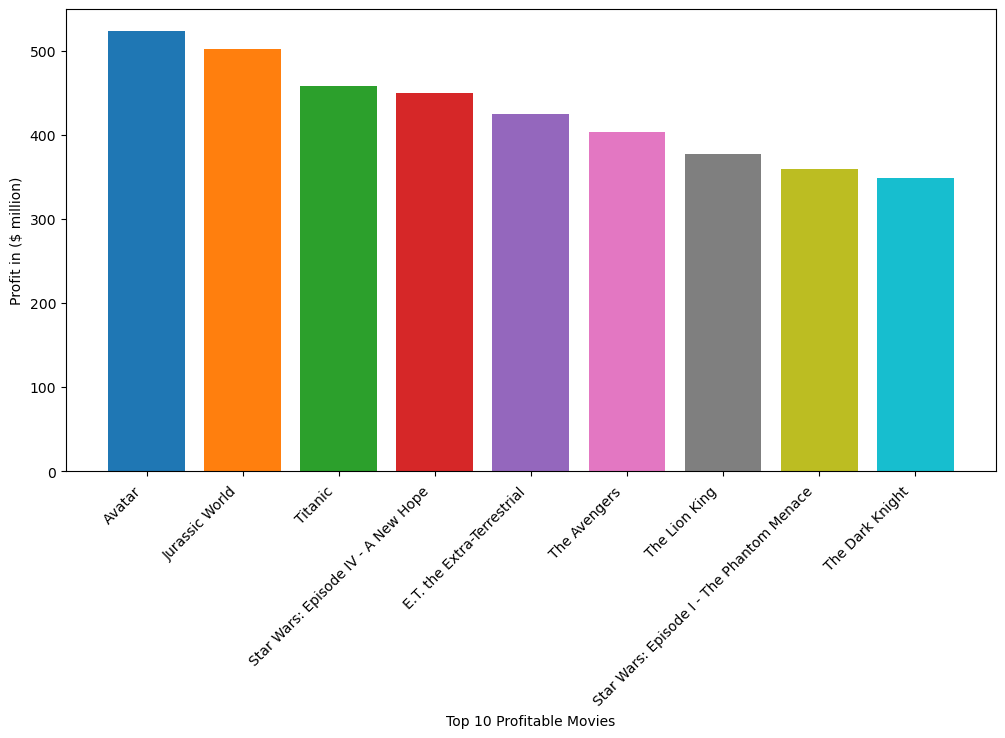

In [50]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.style.use('seaborn-colorblind')
cmap = plt.cm.get_cmap('tab10')

fig, ax = plt.subplots()
fig.set_size_inches([12, 6])
ax.bar(top10_profitable["movie_title"],top10_profitable["profit"], color=cmap(np.linspace(0, 1, len(top10_profitable))))
plt.xticks(rotation=45, ha='right')
ax.set_xlabel("Top 10 Profitable Movies")
ax.set_ylabel("Profit in ($ million)")
plt.show()

fig.savefig("top10Profitablemovies.png")

We also saw in the top10_profitable dataframe that there are duplicate rows for "The Avengers" Movie, which is not clearly visible in above the bar plot. However, it gives a clear indication that there must be some more duplicate movies in the dataframe. Let's check it. 

#### Drop duplicate values

After you found out the top 10 profiting movies, you might have notice a duplicate value. So, it seems like the dataframe has duplicate values as well. Drop the duplicate values from the dataframe and repeat `Subtask 3.2`.

In [51]:
# Finding total number of duplicated rows in the movies dataframe
movies_duplicated = movies[movies.duplicated()]
movies_duplicated

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes,profit
17,Joss Whedon,703,173.0,0,26000,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722,English,USA,PG-13,220.0,2012-01-01,8.1,123000,403.279547
174,Bill Condon,322,115.0,386,21000,292.298923,Adventure|Drama|Fantasy|Romance,Robert Pattinson,The Twilight Saga: Breaking Dawn - Part 2,185394,329,English,USA,PG-13,120.0,2012-01-01,5.5,65000,172.298923
395,Rob Cohen,187,106.0,357,23000,144.512310,Action|Crime|Thriller,Paul Walker,The Fast and the Furious,272223,988,English,USA,PG-13,38.0,2001-01-01,6.7,14000,106.512310
3345,Herbert Ross,60,107.0,71,967,80.000000,Drama|Music|Romance,Dianne Wiest,Footloose,51459,113,English,USA,PG,8.2,1984-01-01,6.5,0,71.800000
214,Paul Verhoeven,196,113.0,719,605,119.412921,Action|Sci-Fi,Ronny Cox,Total Recall,240241,391,English,USA,R,65.0,1990-01-01,7.5,0,54.412921
1220,Angelina Jolie Pitt,322,137.0,11000,769,115.603980,Biography|Drama|Sport|War,Finn Wittrock,Unbroken,103589,351,English,USA,PG-13,65.0,2014-01-01,7.2,35000,50.603980
3452,Paul Haggis,287,115.0,549,3000,54.557348,Crime|Drama|Thriller,Don Cheadle,Crash,361169,1624,English,Germany,R,6.5,2004-01-01,7.9,18000,48.057348
2492,John Carpenter,318,101.0,0,2000,47.000000,Horror|Thriller,Jamie Lee Curtis,Halloween,157857,1191,English,USA,R,0.3,1978-01-01,7.9,12000,46.700000
3984,Peter Cattaneo,122,91.0,11,1000,45.857453,Comedy|Drama|Music,Tom Wilkinson,The Full Monty,82232,174,English,UK,R,3.5,1997-01-01,7.2,0,42.357453
2562,Jon Lucas,81,100.0,24,15000,55.461307,Comedy,Mila Kunis,Bad Moms,4654,46,English,USA,R,20.0,2016-01-01,6.7,18000,35.461307


In [52]:
# There are total 35 duplicated rows.
movies_duplicated.shape[0]

35

Drop the duplicate values using <b>drop_duplicates</b> function. All the columns for duplicate rows need to be dropped and thus, the <b>subset</b> argument is set to <b>None</b>. The <b>keep = first</b> indicates to retain the first row among the duplicate rows, and the <b>inplace = True</b> performs the operation on the dataframe in place.


In [53]:
movies.drop_duplicates(subset = None, keep='first', inplace=True)
movies.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723,178.0,0,1000,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,USA,PG-13,237.0,2009-01-01,7.9,33000,523.505847
29,Colin Trevorrow,644,124.0,365,3000,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,USA,PG-13,150.0,2015-01-01,7.0,150000,502.177271
26,James Cameron,315,194.0,0,29000,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,USA,PG-13,200.0,1997-01-01,7.7,26000,458.672302
3024,George Lucas,282,125.0,0,11000,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,USA,PG,11.0,1977-01-01,8.7,33000,449.935665
3080,Steven Spielberg,215,120.0,14000,861,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,USA,PG,10.5,1982-01-01,7.9,34000,424.449459


In [54]:
# Checking again for duplicate values 
movies_duplicated_check = movies[movies.duplicated()]
movies_duplicated_check

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes,profit


There are no duplicate rows now. 

-  ### 3.3: Finding IMDb Top 250

    1. I will create a new dataframe `IMDb_Top_250` and store the top 250 movies with the highest IMDb Rating (corresponding to the column: `imdb_score`). I will also make sure that for all of these movies, the `num_voted_users` is greater than 25,000. I will also add a `Rank` column containing the values 1 to 250 indicating the ranks of the corresponding films.
    2. I will Extract all the movies in the `IMDb_Top_250` dataframe which are not in the English language and store them in a new dataframe named `Top_Foreign_Lang_Film`.

In [55]:
# sort the movies by IMDb score
IMDb_Top_250 = movies.sort_values(by = 'imdb_score', ascending = False)

# Retain the movies with 'num_voted_users' greater than 25000
IMDb_Top_250 = IMDb_Top_250.loc[IMDb_Top_250.num_voted_users > 25000] 
IMDb_Top_250

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes,profit
1937,Frank Darabont,199,142.0,0,11000,28.341469,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,4144,English,USA,R,25.0,1994-01-01,9.3,108000,3.341469
3466,Francis Ford Coppola,208,175.0,0,14000,134.821952,Crime|Drama,Al Pacino,The Godfather,1155770,2238,English,USA,R,6.0,1972-01-01,9.2,43000,128.821952
2837,Francis Ford Coppola,149,220.0,0,22000,57.300000,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,650,English,USA,R,13.0,1974-01-01,9.0,14000,44.300000
66,Christopher Nolan,645,152.0,22000,23000,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,USA,PG-13,185.0,2008-01-01,9.0,37000,348.316061
3355,Quentin Tarantino,215,178.0,16000,13000,107.930000,Crime|Drama,Bruce Willis,Pulp Fiction,1324680,2195,English,USA,R,8.0,1994-01-01,8.9,45000,99.930000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,Jason Friedberg,112,93.0,82,926,39.737645,Adventure|Comedy,David Carradine,Epic Movie,89687,666,English,USA,PG-13,20.0,2007-01-01,2.3,0,19.737645
319,Lawrence Guterman,78,94.0,6,490,17.010646,Comedy|Family|Fantasy,Jamie Kennedy,Son of the Mask,40751,239,English,USA,PG,84.0,2005-01-01,2.2,881,-66.989354
2268,Jason Friedberg,111,88.0,82,869,14.174654,Comedy,Carmen Electra,Disaster Movie,74945,359,English,USA,PG-13,25.0,2008-01-01,1.9,0,-10.825346
2295,Bob Clark,32,88.0,84,650,9.109322,Comedy|Family|Sci-Fi,Scott Baio,Superbabies: Baby Geniuses 2,25371,129,English,Germany,PG,20.0,2004-01-01,1.9,0,-10.890678


In [56]:
# Using position based indexing to get the first 250 rows in the sorted  and
# Creating a new column rank which contains the rank from 1 to 250

IMDb_Top_250 = IMDb_Top_250.iloc[:250, ]

IMDb_Top_250['Rank'] = range(1,251)
IMDb_Top_250

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes,profit,Rank
1937,Frank Darabont,199,142.0,0,11000,28.341469,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,4144,English,USA,R,25.0,1994-01-01,9.3,108000,3.341469,1
3466,Francis Ford Coppola,208,175.0,0,14000,134.821952,Crime|Drama,Al Pacino,The Godfather,1155770,2238,English,USA,R,6.0,1972-01-01,9.2,43000,128.821952,2
2837,Francis Ford Coppola,149,220.0,0,22000,57.300000,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,650,English,USA,R,13.0,1974-01-01,9.0,14000,44.300000,3
66,Christopher Nolan,645,152.0,22000,23000,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,USA,PG-13,185.0,2008-01-01,9.0,37000,348.316061,4
3355,Quentin Tarantino,215,178.0,16000,13000,107.930000,Crime|Drama,Bruce Willis,Pulp Fiction,1324680,2195,English,USA,R,8.0,1994-01-01,8.9,45000,99.930000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813,Philip Kaufman,80,193.0,133,2000,21.500000,Adventure|Drama|History,Dennis Quaid,The Right Stuff,45271,170,English,USA,PG,27.0,1983-01-01,7.9,0,-5.500000,246
2177,Tim Burton,111,105.0,13000,40000,56.362352,Fantasy|Romance,Johnny Depp,Edward Scissorhands,357581,588,English,USA,PG-13,20.0,1990-01-01,7.9,16000,36.362352,247
353,John Lasseter,191,82.0,487,15000,245.823397,Adventure|Animation|Comedy|Family|Fantasy,Tom Hanks,Toy Story 2,385871,515,English,USA,G,90.0,1999-01-01,7.9,0,155.823397,248
3193,Paul Haggis,287,115.0,549,3000,54.557348,Crime|Drama|Thriller,Don Cheadle,Crash,361169,1624,English,Germany,R,6.5,2004-01-01,7.9,18000,48.057348,249


In [57]:
# Getting the non-english language films using conditional label based indexing
Top_Foreign_Lang_Film = IMDb_Top_250.loc[IMDb_Top_250['language'] != 'English']
Top_Foreign_Lang_Film

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes,profit,Rank
4498,Sergio Leone,181,142.0,0,16000,6.100000,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,780,Italian,Italy,Approved,1.20,1966-01-01,8.9,20000,4.900000,8
4029,Fernando Meirelles,214,135.0,353,1000,7.563397,Crime|Drama,Alice Braga,City of God,533200,749,Portuguese,Brazil,R,3.30,2002-01-01,8.7,28000,4.263397,18
4747,Akira Kurosawa,153,202.0,0,304,0.269061,Action|Adventure|Drama,Takashi Shimura,Seven Samurai,229012,596,Japanese,Japan,Unrated,2.00,1954-01-01,8.7,11000,-1.730939,20
2373,Hayao Miyazaki,246,125.0,6000,17,10.049886,Adventure|Animation|Family|Fantasy,Bunta Sugawara,Spirited Away,417971,902,Japanese,Japan,PG,19.00,2001-01-01,8.6,28000,-8.950114,23
4259,Florian Henckel von Donnersmarck,215,137.0,207,380,11.284657,Drama|Thriller,Sebastian Koch,The Lives of Others,259379,407,German,Germany,R,2.00,2006-01-01,8.5,39000,9.284657,32
4921,Majid Majidi,46,89.0,373,36,0.925402,Drama|Family,Bahare Seddiqi,Children of Heaven,27882,130,Persian,Iran,PG,0.18,1997-01-01,8.5,0,0.745402,46
4659,Asghar Farhadi,354,123.0,0,786,7.098492,Drama|Mystery,Shahab Hosseini,A Separation,151812,264,Persian,Iran,PG-13,0.50,2011-01-01,8.4,48000,6.598492,48
4105,Chan-wook Park,305,120.0,0,717,2.181290,Drama|Mystery|Thriller,Min-sik Choi,Oldboy,356181,809,Korean,South Korea,R,3.00,2003-01-01,8.4,43000,-0.818710,52
2323,Hayao Miyazaki,174,134.0,6000,893,2.298191,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,570,Japanese,Japan,PG-13,2400.00,1997-01-01,8.4,11000,-2397.701809,55
2970,Wolfgang Petersen,96,293.0,249,362,11.433134,Adventure|Drama|Thriller|War,Jürgen Prochnow,Das Boot,168203,426,German,West Germany,R,14.00,1981-01-01,8.4,11000,-2.566866,56


In [58]:
Top_Foreign_Lang_Film.shape[0]

35

There are total 35 foreign movies

**Checkpoint 3:** Can you spot `Children of Heaven` in the dataframe?

In [59]:
Count_Top_Foreign_Lang_Film = Top_Foreign_Lang_Film['language'].value_counts(sort=True)

In [60]:
Count_Top_Foreign_Lang_Film = pd.DataFrame(Count_Top_Foreign_Lang_Film)

In [61]:
Count_Top_Foreign_Lang_Film

,count
language,
Japanese,6
French,5
German,4
Spanish,4
Portuguese,3
Italian,2
Persian,2
Korean,2
Danish,2


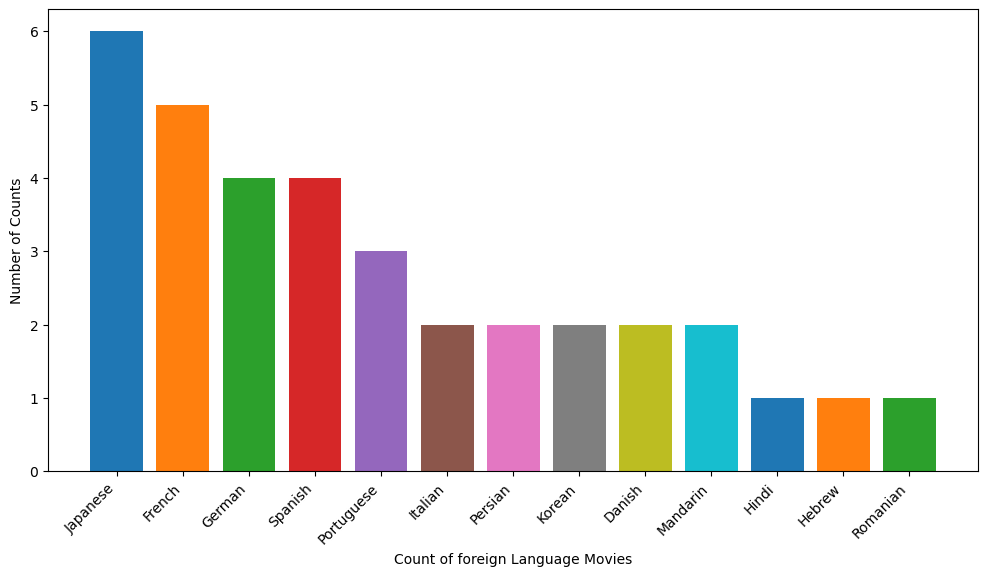

In [62]:
cmap = plt.cm.get_cmap('tab10')

fig, ax = plt.subplots()
fig.set_size_inches([12, 6])
ax.bar(Count_Top_Foreign_Lang_Film.index, Count_Top_Foreign_Lang_Film['count'], color=cmap(np.linspace(0, 1, len(top10_profitable))))
plt.xticks(rotation=45, ha='right')
ax.set_xlabel("Count of foreign Language Movies")
ax.set_ylabel("Number of Counts")
plt.show()

fig.savefig("Count_Top_Foreign_Lang_Film.png")

As we can see most of the foreign language movies are Japanese, French and Spanish. The lowest count are Hindi, Hebrew, and Romanian.

In [63]:
# Getting the English language films using conditional label based indexing
Top_English_Lang_Film = IMDb_Top_250.loc[IMDb_Top_250['language'] == 'English']
Top_English_Lang_Film

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes,profit,Rank
1937,Frank Darabont,199,142.0,0,11000,28.341469,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,4144,English,USA,R,25.0,1994-01-01,9.3,108000,3.341469,1
3466,Francis Ford Coppola,208,175.0,0,14000,134.821952,Crime|Drama,Al Pacino,The Godfather,1155770,2238,English,USA,R,6.0,1972-01-01,9.2,43000,128.821952,2
2837,Francis Ford Coppola,149,220.0,0,22000,57.300000,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,650,English,USA,R,13.0,1974-01-01,9.0,14000,44.300000,3
66,Christopher Nolan,645,152.0,22000,23000,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,USA,PG-13,185.0,2008-01-01,9.0,37000,348.316061,4
3355,Quentin Tarantino,215,178.0,16000,13000,107.930000,Crime|Drama,Bruce Willis,Pulp Fiction,1324680,2195,English,USA,R,8.0,1994-01-01,8.9,45000,99.930000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813,Philip Kaufman,80,193.0,133,2000,21.500000,Adventure|Drama|History,Dennis Quaid,The Right Stuff,45271,170,English,USA,PG,27.0,1983-01-01,7.9,0,-5.500000,246
2177,Tim Burton,111,105.0,13000,40000,56.362352,Fantasy|Romance,Johnny Depp,Edward Scissorhands,357581,588,English,USA,PG-13,20.0,1990-01-01,7.9,16000,36.362352,247
353,John Lasseter,191,82.0,487,15000,245.823397,Adventure|Animation|Comedy|Family|Fantasy,Tom Hanks,Toy Story 2,385871,515,English,USA,G,90.0,1999-01-01,7.9,0,155.823397,248
3193,Paul Haggis,287,115.0,549,3000,54.557348,Crime|Drama|Thriller,Don Cheadle,Crash,361169,1624,English,Germany,R,6.5,2004-01-01,7.9,18000,48.057348,249


#### Creating a function to check if the relevant table is a dataframe or not

In [65]:
def is_dataframe(data):
    return isinstance(data, pd.DataFrame)

result = is_dataframe(Top_English_Lang_Film)

if result:
    print("Yes, It is a dataframe")
else:
    print("It is not a dataframe")

Yes, It is a dataframe


- ### 3.4: Find the best directors

    - Finding out the top 10 directors for whom the mean of `imdb_score` is the highest and store them in a new dataframe `top10director`. 

In [66]:
top10director = movies.pivot_table(values = 'imdb_score', index = 'director_name')
top10director = top10director.sort_values(by = 'imdb_score', ascending = False)
top10director = top10director.iloc[:10, ]
top10director

,imdb_score
director_name,
Akira Kurosawa,8.700000
Charles Chaplin,8.600000
Tony Kaye,8.600000
Alfred Hitchcock,8.500000
Damien Chazelle,8.500000
Ron Fricke,8.500000
Majid Majidi,8.500000
Sergio Leone,8.433333
Christopher Nolan,8.425000


In [67]:
top10director['imdb_score'] = top10director['imdb_score'].round(2)
top10director

,imdb_score
director_name,
Akira Kurosawa,8.70
Charles Chaplin,8.60
Tony Kaye,8.60
Alfred Hitchcock,8.50
Damien Chazelle,8.50
Ron Fricke,8.50
Majid Majidi,8.50
Sergio Leone,8.43
Christopher Nolan,8.43


**Checkpoint 4:** No surprises that `Damien Chazelle` (director of Whiplash and La La Land) is in this list.

-  ### 3.5: Find popular genres

You might have noticed the `genres` column in the dataframe with all the genres of the movies seperated by a pipe (`|`). Out of all the movie genres, the first two are most significant for any film.

1. Extracting the first two genres from the `genres` column and store them in two new columns: `genre_1` and `genre_2`. Some of the movies might have only one genre. In such cases, I will extract the single genre into both the columns, i.e. for such movies the `genre_2` will be the same as `genre_1`.
2. Grouping the dataframe using `genre_1` as the primary column and `genre_2` as the secondary column.
3. Finding out the 5 most popular combo of genres by finding the mean of the gross values using the `gross` column and store them in a new dataframe named `PopGenre`.

In [68]:
movies['genres']

0                         Action|Adventure|Fantasy|Sci-Fi
29                       Action|Adventure|Sci-Fi|Thriller
26                                          Drama|Romance
3024                      Action|Adventure|Fantasy|Sci-Fi
3080                                        Family|Sci-Fi
                              ...                        
2334    Action|Adventure|Animation|Family|Sci-Fi|Thriller
2323                          Adventure|Animation|Fantasy
3005                                    Drama|Romance|War
3859                                          Crime|Drama
2988                           Comedy|Drama|Horror|Sci-Fi
Name: genres, Length: 3803, dtype: object

In [69]:
# Split the elements of the 'genre' column at the pipe characters ('|') using str.split()
movies['genres'] = movies['genres'].str.split('|')
movies['genres']

0                    [Action, Adventure, Fantasy, Sci-Fi]
29                  [Action, Adventure, Sci-Fi, Thriller]
26                                       [Drama, Romance]
3024                 [Action, Adventure, Fantasy, Sci-Fi]
3080                                     [Family, Sci-Fi]
                              ...                        
2334    [Action, Adventure, Animation, Family, Sci-Fi,...
2323                      [Adventure, Animation, Fantasy]
3005                                [Drama, Romance, War]
3859                                       [Crime, Drama]
2988                      [Comedy, Drama, Horror, Sci-Fi]
Name: genres, Length: 3803, dtype: object

In [70]:
# Assign the first elements of the rows of 'genre' column to a new column named 'genre_1' using 'apply()' and lambda functions
movies['genre_1'] = movies['genres'].apply(lambda x: x[0])
movies['genre_1']

0          Action
29         Action
26          Drama
3024       Action
3080       Family
          ...    
2334       Action
2323    Adventure
3005        Drama
3859        Crime
2988       Comedy
Name: genre_1, Length: 3803, dtype: object

In [71]:
# Some of the movies have only one genre. In such cases, assign the same genre to 'genre_2' as well
movies['genre_2'] = movies['genres'].apply(lambda x: x[1] if len(x) > 1 else x[0])
movies['genre_2']

0       Adventure
29      Adventure
26        Romance
3024    Adventure
3080       Sci-Fi
          ...    
2334    Adventure
2323    Animation
3005      Romance
3859        Drama
2988        Drama
Name: genre_2, Length: 3803, dtype: object

In [72]:
# Grouping the dataframe using 'genre_1' as the primary column and 'genre_2' as secondary 

movies_by_segment = movies.groupby(['genre_1', 'genre_2'])
movies_by_segment

In [73]:
# Creating a new dataframe PopGenre which contains the 'mean' of the gross values of each combination of genres present.
# sorting this dataframe using the 'gross' column and use index-based positioning to find out the five most popular genre combos

PopGenre = pd.DataFrame(movies_by_segment['gross'].mean()).sort_values(by = 'gross', ascending = False)
PopGenre.iloc[:5, ]

gross
genre_1   genre_2              
Family    Sci-Fi     434.949459
Adventure Sci-Fi     228.627758
          Family     118.919540
          Animation  118.007123
Action    Adventure  109.846311

**Checkpoint 5:** Well, as it turns out. `Family + Sci-Fi` is the most popular combo of genres out there!

-  ### Subtask 3.6: Finding the critic-favorite and audience-favorite actors

    1. Creating three new dataframes namely, `Meryl_Streep`, `Leo_Caprio`, and `Brad_Pitt` which contain the movies in which the actors: 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' are the lead actors. I will use only the `actor_1_name` column for extraction. Also, make sure that you use the names 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' for the said extraction.
    2. Appending the rows of all these dataframes and storing them in a new dataframe named `Combined`.
    3. Grouping the combined dataframe using the `actor_1_name` column.
    4. Finding the mean of the `num_critic_for_reviews` and `num_user_for_review` and identifying the actors which have the highest mean.

In [74]:
# Creating a new dataframe containing Meryl Streep movies in which she is the lead actor

Meryl_Streep = movies.loc[movies.actor_1_name == 'Meryl Streep']
Meryl_Streep

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,...,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2
1408,David Frankel,208,109.0,64,11000,124.732962,"[Comedy, Drama, Romance]",Meryl Streep,The Devil Wears Prada,286178,...,English,USA,PG-13,35.0,2006-01-01,6.8,0,89.732962,Comedy,Drama
1575,Sydney Pollack,66,161.0,521,11000,87.100000,"[Biography, Drama, Romance]",Meryl Streep,Out of Africa,52339,...,English,USA,PG,31.0,1985-01-01,7.2,0,56.100000,Biography,Drama
1204,Nora Ephron,252,123.0,0,11000,94.125426,"[Biography, Drama, Romance]",Meryl Streep,Julie & Julia,79264,...,English,USA,PG-13,40.0,2009-01-01,7.0,13000,54.125426,Biography,Drama
1618,David Frankel,234,100.0,64,11000,63.536011,"[Comedy, Drama, Romance]",Meryl Streep,Hope Springs,34258,...,English,USA,PG-13,30.0,2012-01-01,6.3,0,33.536011,Comedy,Drama
410,Nancy Meyers,187,120.0,278,11000,112.703470,"[Comedy, Drama, Romance]",Meryl Streep,It's Complicated,69860,...,English,USA,R,85.0,2009-01-01,6.6,0,27.703470,Comedy,Drama
2781,Phyllida Lloyd,331,105.0,58,11000,29.959436,"[Biography, Drama, History]",Meryl Streep,The Iron Lady,82327,...,English,UK,PG-13,13.0,2011-01-01,6.4,18000,16.959436,Biography,Drama
1925,Stephen Daldry,174,114.0,335,11000,41.597830,"[Drama, Romance]",Meryl Streep,The Hours,102123,...,English,USA,PG-13,25.0,2002-01-01,7.6,0,16.597830,Drama,Romance
3135,Robert Altman,211,105.0,500,11000,20.338609,"[Comedy, Drama, Music]",Meryl Streep,A Prairie Home Companion,19655,...,English,USA,PG-13,10.0,2006-01-01,6.8,683,10.338609,Comedy,Drama
1106,Curtis Hanson,42,111.0,161,11000,46.815748,"[Action, Adventure, Crime, Thriller]",Meryl Streep,The River Wild,32544,...,English,USA,PG-13,45.0,1994-01-01,6.3,0,1.815748,Action,Adventure
1674,Carl Franklin,64,127.0,73,11000,23.209440,[Drama],Meryl Streep,One True Thing,9283,...,English,USA,R,30.0,1998-01-01,7.0,592,-6.790560,Drama,Drama


In [75]:
# Creating a new dataframe containing Leonardo DiCaprio movies in which he is the lead actor

Leo_Caprio = movies.loc[movies.actor_1_name == 'Leonardo DiCaprio']
Leo_Caprio

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,...,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2
26,James Cameron,315,194.0,0,29000,658.672302,"[Drama, Romance]",Leonardo DiCaprio,Titanic,793059,...,English,USA,PG-13,200.0,1997-01-01,7.7,26000,458.672302,Drama,Romance
97,Christopher Nolan,642,148.0,22000,29000,292.568851,"[Action, Adventure, Sci-Fi, Thriller]",Leonardo DiCaprio,Inception,1468200,...,English,USA,PG-13,160.0,2010-01-01,8.8,175000,132.568851,Action,Adventure
911,Steven Spielberg,194,141.0,14000,29000,164.435221,"[Biography, Crime, Drama]",Leonardo DiCaprio,Catch Me If You Can,525801,...,English,USA,PG-13,52.0,2002-01-01,8.0,15000,112.435221,Biography,Crime
296,Quentin Tarantino,765,165.0,16000,29000,162.804648,"[Drama, Western]",Leonardo DiCaprio,Django Unchained,955174,...,English,USA,R,100.0,2012-01-01,8.5,199000,62.804648,Drama,Western
179,Alejandro G. Iñárritu,556,156.0,0,29000,183.635922,"[Adventure, Drama, Thriller, Western]",Leonardo DiCaprio,The Revenant,406020,...,English,USA,R,135.0,2015-01-01,8.1,190000,48.635922,Adventure,Drama
452,Martin Scorsese,490,138.0,17000,29000,127.968405,"[Mystery, Thriller]",Leonardo DiCaprio,Shutter Island,786092,...,English,USA,R,80.0,2010-01-01,8.1,53000,47.968405,Mystery,Thriller
361,Martin Scorsese,352,151.0,17000,29000,132.373442,"[Crime, Drama, Thriller]",Leonardo DiCaprio,The Departed,873649,...,English,USA,R,90.0,2006-01-01,8.5,29000,42.373442,Crime,Drama
3476,Baz Luhrmann,490,143.0,1000,29000,144.812796,"[Drama, Romance]",Leonardo DiCaprio,The Great Gatsby,362933,...,English,Australia,PG-13,105.0,2013-01-01,7.3,115000,39.812796,Drama,Romance
50,Baz Luhrmann,490,143.0,1000,29000,144.812796,"[Drama, Romance]",Leonardo DiCaprio,The Great Gatsby,362912,...,English,Australia,PG-13,105.0,2013-01-01,7.3,115000,39.812796,Drama,Romance
2757,Baz Luhrmann,106,120.0,1000,29000,46.338728,"[Drama, Romance]",Leonardo DiCaprio,Romeo + Juliet,167750,...,English,USA,PG-13,14.5,1996-01-01,6.8,10000,31.838728,Drama,Romance


In [76]:
# Creating a new dataframe containing Brad Pitt movies in which he is the lead actor

Brad_Pitt = movies.loc[movies.actor_1_name == 'Brad Pitt']
Brad_Pitt

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,...,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2
400,Steven Soderbergh,186,116.0,0,11000,183.405771,"[Crime, Thriller]",Brad Pitt,Ocean's Eleven,402645,...,English,USA,PG-13,85.0,2001-01-01,7.8,0,98.405771,Crime,Thriller
255,Doug Liman,233,126.0,218,11000,186.336103,"[Action, Comedy, Crime, Romance, Thriller]",Brad Pitt,Mr. & Mrs. Smith,348861,...,English,USA,PG-13,120.0,2005-01-01,6.5,0,66.336103,Action,Comedy
940,Neil Jordan,120,123.0,277,11000,105.264608,"[Drama, Fantasy, Horror]",Brad Pitt,Interview with the Vampire: The Vampire Chroni...,239752,...,English,USA,R,60.0,1994-01-01,7.6,11000,45.264608,Drama,Fantasy
470,David Ayer,406,134.0,452,11000,85.707116,"[Action, Drama, War]",Brad Pitt,Fury,303185,...,English,USA,R,68.0,2014-01-01,7.6,82000,17.707116,Action,Drama
254,Steven Soderbergh,198,125.0,0,11000,125.531634,"[Crime, Thriller]",Brad Pitt,Ocean's Twelve,284852,...,English,USA,PG-13,110.0,2004-01-01,6.4,0,15.531634,Crime,Thriller
2204,Alejandro G. Iñárritu,285,143.0,0,11000,34.300771,[Drama],Brad Pitt,Babel,243799,...,English,France,R,25.0,2006-01-01,7.5,0,9.300771,Drama,Drama
2682,Andrew Dominik,414,97.0,181,11000,14.938570,"[Crime, Thriller]",Brad Pitt,Killing Them Softly,111625,...,English,USA,R,15.0,2012-01-01,6.2,20000,-0.061430,Crime,Thriller
2898,Tony Scott,122,121.0,12000,11000,12.281500,"[Action, Crime, Drama, Romance, Thriller]",Brad Pitt,True Romance,163492,...,English,USA,R,13.0,1993-01-01,8.0,15000,-0.718500,Action,Crime
2333,Angelina Jolie Pitt,131,122.0,11000,11000,0.531009,"[Drama, Romance]",Brad Pitt,By the Sea,7976,...,English,USA,R,10.0,2015-01-01,5.3,0,-9.468991,Drama,Romance
1490,Terrence Malick,584,139.0,0,11000,13.303319,"[Drama, Fantasy]",Brad Pitt,The Tree of Life,136367,...,English,USA,PG-13,32.0,2011-01-01,6.7,39000,-18.696681,Drama,Fantasy


In [77]:
# Combining the three dataframes using 'pd.concat()'

combined = pd.concat([Meryl_Streep, Brad_Pitt, Leo_Caprio])
combined.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,...,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2
1408,David Frankel,208,109.0,64,11000,124.732962,"[Comedy, Drama, Romance]",Meryl Streep,The Devil Wears Prada,286178,...,English,USA,PG-13,35.0,2006-01-01,6.8,0,89.732962,Comedy,Drama
1575,Sydney Pollack,66,161.0,521,11000,87.100000,"[Biography, Drama, Romance]",Meryl Streep,Out of Africa,52339,...,English,USA,PG,31.0,1985-01-01,7.2,0,56.100000,Biography,Drama
1204,Nora Ephron,252,123.0,0,11000,94.125426,"[Biography, Drama, Romance]",Meryl Streep,Julie & Julia,79264,...,English,USA,PG-13,40.0,2009-01-01,7.0,13000,54.125426,Biography,Drama
1618,David Frankel,234,100.0,64,11000,63.536011,"[Comedy, Drama, Romance]",Meryl Streep,Hope Springs,34258,...,English,USA,PG-13,30.0,2012-01-01,6.3,0,33.536011,Comedy,Drama
410,Nancy Meyers,187,120.0,278,11000,112.703470,"[Comedy, Drama, Romance]",Meryl Streep,It's Complicated,69860,...,English,USA,R,85.0,2009-01-01,6.6,0,27.703470,Comedy,Drama


In [78]:
combined.shape

(49, 21)

In [79]:
# Grouping the dataframe by 'actor_1_name'

combined_by_segment = combined.groupby('actor_1_name')
combined_by_segment


In [80]:
# Remember that we had some null values for the column 'num_critic_for_reviews'. Make sure that none of these values are present
# in the new dataframe - 'combined'

combined.isnull().sum()

director_name              0
num_critic_for_reviews     0
duration                   0
director_facebook_likes    0
actor_1_facebook_likes     0
gross                      0
genres                     0
actor_1_name               0
movie_title                0
num_voted_users            0
num_user_for_reviews       0
language                   0
country                    0
content_rating             0
budget                     0
title_year                 0
imdb_score                 0
movie_facebook_likes       0
profit                     0
genre_1                    0
genre_2                    0
dtype: int64

We are good to go.

In [81]:
# Finding the mean of 'num_user_for_reviews' for each of the actor. 

audience_favourite_actor = combined_by_segment['num_user_for_reviews'].mean()
audience_favourite_actor

actor_1_name
Brad Pitt            742.352941
Leonardo DiCaprio    914.476190
Meryl Streep         297.181818
Name: num_user_for_reviews, dtype: float64

In [82]:
# Finding the mean of 'num_critic_for_reviews' for each actor. 

critic_favourite_actor = combined_by_segment['num_critic_for_reviews'].mean()
critic_favourite_actor

actor_1_name
Brad Pitt            245.000000
Leonardo DiCaprio    330.190476
Meryl Streep         181.454545
Name: num_critic_for_reviews, dtype: float64

**Checkpoint 6:** `Leonardo DiCaprio` has aced both the lists!

In [83]:
result = is_dataframe(audience_favourite_actor)

if result:
    print("Yes, It is a dataframe")
else:
    print("It is not a dataframe")

It is not a dataframe


### Changing them into dataframes for visualization

In [84]:
audience_favourite_actor = pd.DataFrame(audience_favourite_actor)
print(audience_favourite_actor)

                   num_user_for_reviews
actor_1_name                           
Brad Pitt                    742.352941
Leonardo DiCaprio            914.476190
Meryl Streep                 297.181818


In [85]:
audience_favourite_actor = audience_favourite_actor.reset_index()

In [86]:
audience_favourite_actor

,actor_1_name,num_user_for_reviews
0,Brad Pitt,742.352941
1,Leonardo DiCaprio,914.476190
2,Meryl Streep,297.181818


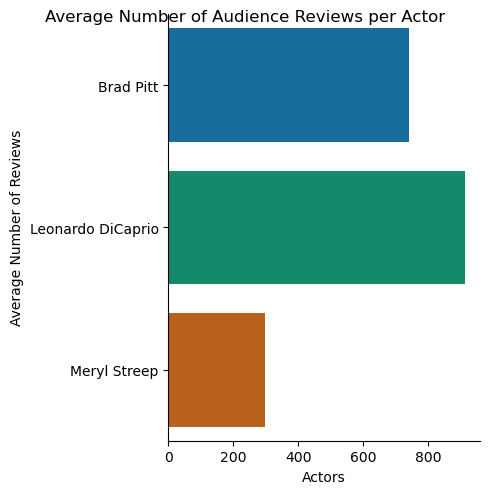

In [88]:
import seaborn as sns

g=sns.catplot(x="num_user_for_reviews", y="actor_1_name", data=audience_favourite_actor, kind="bar")
g.set(xlabel="Actors",
      ylabel="Average Number of Reviews")
g.fig.suptitle("Average Number of Audience Reviews per Actor")
plt.show()

In [139]:
critic_favourite_actor = pd.DataFrame(critic_favourite_actor)
print(critic_favourite_actor)

                   num_critic_for_reviews
actor_1_name                             
Brad Pitt                      245.000000
Leonardo DiCaprio              330.190476
Meryl Streep                   181.454545


In [140]:
critic_favourite_actor = critic_favourite_actor.reset_index()
critic_favourite_actor

,actor_1_name,num_critic_for_reviews
0,Brad Pitt,245.000000
1,Leonardo DiCaprio,330.190476
2,Meryl Streep,181.454545


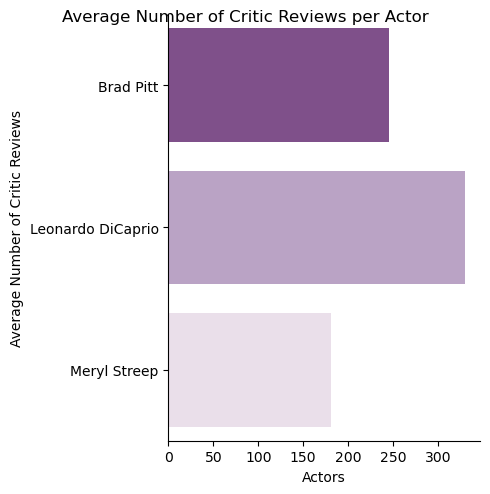

In [145]:
sns.set_palette("PRGn")
g=sns.catplot(x="num_critic_for_reviews", y="actor_1_name", data=critic_favourite_actor, kind="bar")
g.set(xlabel="Actors",
      ylabel="Average Number of Critic Reviews")
g.fig.suptitle("Average Number of Critic Reviews per Actor")
plt.show()

**Visualization confirms:** `Leonardo DiCaprio` has aced both the lists!